In [1]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
X,y=load_boston().data,load_boston().target
X=StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [2]:
from sklearn.linear_model import LinearRegression as sklearn_lr
model=sklearn_lr().fit(X_train,y_train)
print(model.coef_)
print(model.intercept_)

[-1.21542414  1.39149189  0.40566574  0.86914052 -2.22073677  1.89749647
  0.38360735 -3.39653212  2.72719218 -2.27558269 -1.87914371  0.75568354
 -4.32719709]
22.435045243106593


In [3]:
model.predict(X_test)[:10]

array([25.14601856, 12.33319877, 30.71361186, 26.22317309, 35.70077447,
       21.53976546, 13.05206972, 23.71354513, 24.16945786,  9.9221415 ])

### 1.使用Scipy optimize求解线性回归

In [4]:
from scipy.optimize import lsq_linear
class LinearRegression:
    def fit(self,X,y):
        _,n=np.shape(X)
        X=np.insert(X,n,1,axis=1)          
        A = X
        b = y
        res = lsq_linear(A, b, lsmr_tol='auto', verbose=1)
        self.coef_=res.x[:-1]
        self.intercept_=res.x[-1]
        self.res=res
        return self
    def predict(self,X):
        return np.array(X@self.coef_.reshape(-1,1)+self.intercept_).flatten()
           
model=LinearRegression().fit(X_train,y_train)
model.predict(X_test)[:5]

The unconstrained solution is optimal.
Final cost 4.0332e+03, first-order optimality 2.80e-12


array([25.14601856, 12.33319877, 30.71361186, 26.22317309, 35.70077447])

### 3.使用Scipy求解带L2正则化的线性回归

In [5]:
class Ridge:
    def __init__(self,c=0.0001):
        self.c=c
    def fit(self,X,y):
        init_w=np.random.randn(X.shape[1]+1)
        res=minimize(type(self).loss,init_w,args=(X,y))
        self.coef_=res.x[:-1]
        self.intercept_=res.x[-1]
        return self
    def predict(self,X):
        pred=X@self.coef_.T+self.intercept_
        return pred
    
    def loss(w,X,y,c=0.1):
        _,n=np.shape(X)
        X=np.insert(X,n,1,axis=1)                                                 
        loss=np.square(y-X@w).sum()+c*np.square(w[:-1]).sum()    #minmize ||y - Xw||^2_2 + alpha * ||w||^2_2
        return loss
model=Ridge().fit(X_train,y_train)
pre=model.predict(X_test)
pre[:10]

array([25.14928477, 12.32855732, 30.70902042, 26.22042231, 35.69482334,
       21.5348613 , 13.05112962, 23.71089212, 24.16714347,  9.92352321])

In [6]:
from sklearn.linear_model import Ridge as sklearn_Ridge
model=sklearn_Ridge(alpha=0.0001).fit(X_train,y_train)
pre2=model.predict(X_test)
pre2[:10]

array([25.14602183, 12.33319412, 30.71360725, 26.22317032, 35.70076851,
       21.53976054, 13.05206877, 23.71354247, 24.16945554,  9.92214288])

### 3.使用梯度下降法求解线性回归

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
class LinearRegression:
    def __init__(self,learning_rate=0.03,max_iters=50):
        self.learning_rate=learning_rate
        self.max_iters=max_iters
        self.grads=[]
    def fit(self,X,y):
        m,n=np.shape(X)
        X=np.insert(X,n,1,axis=1)          #将X新增一列为1的列向量
        W=np.random.randn(X.shape[1])
        loss_series=[]
        for i in range(self.max_iters):
            error=X@W.T-y
            grad=(2*X.T@error)/m
            self.grads.append(grad)
            W=W-self.learning_rate*grad  #更新权重
            current_loss=np.square(error).sum()/m
            loss_series.append(current_loss)
        plt.plot(range(self.max_iters),loss_series,color='blue')
        plt.xlabel('The number of iterations')
        plt.ylabel('The mean square error')
        self.W=W
        self.coef_=W[:-1]
        self.intercept=W[:-1]
        
        return self
    def predict(self,X):
        X_=np.full(shape=(X.shape[0],1),fill_value=1)
        X=np.concatenate([X,X_],axis=1)
        pre=X@self.W.T
        return pre

21.515179626484365

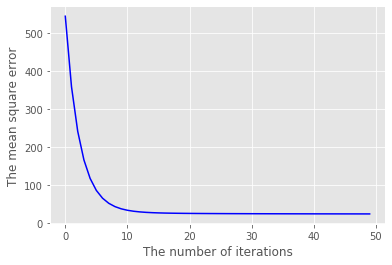

In [8]:
lr=LinearRegression(learning_rate=0.1).fit(X_train,y_train)
mean_squared_error(y_test,lr.predict(X_test))

### 4.使用随机梯度下降法

In [9]:
class LinearRegression:
    def __init__(self,learning_rate=0.03,max_iters=100):
        self.learning_rate=learning_rate
        self.max_iters=max_iters
    def fit(self,X,y):
        m,n=np.shape(X)
        X=np.insert(X,n,1,axis=1)          #将X新增一列为1的列向量
        W=np.random.randn(X.shape[1])
        loss_series=[]
        for i in range(self.max_iters):
            dataIndex=list(range(m))
            for j in range(m):
                alpha = 4/(1.0+j+i)+0.001   
                randIndex = int(np.random.uniform(0,len(dataIndex)))  #随机挑选一个样本进行迭代                       
                error=X[randIndex]@W.T-y[randIndex]
                grad=(X[randIndex].T*error)/m
                W=W-self.learning_rate*grad  #更新权重
                del (dataIndex[randIndex])
            current_loss=np.square(error).sum()/m
            loss_series.append(current_loss)
        plt.plot(range(self.max_iters),loss_series,color='blue')
        plt.xlabel('The number of iterations')
        plt.ylabel('The mean square error')
        self.W=W
        self.coef_=W[:-1]
        self.intercept=W[:-1]
        
        return self
    def predict(self,X):
        X_=np.full(shape=(X.shape[0],1),fill_value=1)
        X=np.concatenate([X,X_],axis=1)
        pre=X@self.W.T
        return pre

21.93633649949422

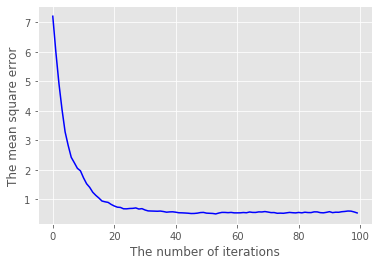

In [10]:
lr=LinearRegression(learning_rate=0.1).fit(X_train,y_train)
mean_squared_error(y_test,lr.predict(X_test))

### 5.使用坐标轴下降法求解Lasso

In [11]:
#from https://github.com/luowanqian/MachineLearning
import numpy as np
from sklearn import preprocessing

class Lasso:
    """
    The optimization objective of Lasso is
        1/(2 * n) * ||y - Xw||^2_2 + alpha * ||w||_1
    """

    def __init__(self, alpha=1.0, fit_intercept=True, normalize=False,
                 copy_X=True, max_iter=1000, tol=0.0001, selection='cyclic'):
        self.alpha = alpha
        self._fit_intercept = fit_intercept
        self.normalize = normalize
        self._copy_X = copy_X
        self.max_iter = max_iter
        self.tol = tol
        self._selection = selection

        if normalize:
            self._scaler = preprocessing.StandardScaler()

    def compute_step(self, k, X, y, coef, intercept, alpha):
        n, p = X.shape
        y_predict = np.dot(X, coef) + intercept
        rk = np.dot(X[:, k], y - y_predict + X[:, k] * coef[k])
        rk = rk / (1.0 * n)
        zk = np.linalg.norm(X[:, k], ord=2) ** 2
        zk = zk / (1.0 * n)
        coef_k = (np.amax([rk-alpha, 0]) - np.amax([-rk-alpha, 0]))
        coef_k = coef_k / (1.0 * zk)

        return coef_k

    def objective(self, X, y, coef, intercept, alpha):
        n, p = X.shape
        total = 0

        y_predict = np.dot(X, coef) + intercept
        total += \
            1/(2.0*n) * np.linalg.norm(y-y_predict, ord=2) ** 2
        total += alpha * np.linalg.norm(coef, ord=1)

        return total

    def fit(self, X, y):
        if self._copy_X:
            X = X.copy()
        if self.normalize:
            X = self._scaler.fit_transform(X)
        self._objectives = []

        # initialize data
        num_samples, num_features = X.shape
        coef = np.zeros(num_features)
        old_coef = np.zeros(num_features)
        intercept = 0
        if self._fit_intercept:
            tmp = y - np.dot(X, coef)
            intercept = np.sum(tmp) / (1.0 * num_samples)
        num_iters = 0
        for iter in range(self.max_iter):
            num_iters = num_iters + 1
            if (self._selection == 'cyclic'):
                for k in range(num_features):
                    old_coef[k] = coef[k]
                    coef[k] = self.compute_step(k, X, y, coef,
                                                intercept, self.alpha)
                if self._fit_intercept:
                    tmp = y - np.dot(X, coef)
                    intercept = np.sum(tmp) / (1.0 * num_samples)

                # check condition of convergence
                coef_updates = np.abs(coef - old_coef)
                if np.amax(coef_updates) < self.tol:
                    break
            self._objectives.append(self.objective(X, y, coef,
                                                   intercept, self.alpha))
        plt.plot(range(num_iters-1),[i/num_samples for i in self._objectives])
        plt.xlabel('The number of iterations')
        plt.ylabel('The mean square error')
        plt.title('The loss curve')
        self.coef = coef
        self.intercept = intercept
        self.num_iters = num_iters
        
        return self

    def predict(self, X):
        if self._copy_X:
            X = X.copy()
        if self.normalize:
            X = self._scaler.transform(X)
        y_predict = np.dot(X, self.coef) + self.intercept
        return y_predict

[30.4143634  25.18829676 30.89925187 29.05721601 28.42510132]
[30.4143669  25.18829656 30.89925312 29.05721568 28.4251009 ]


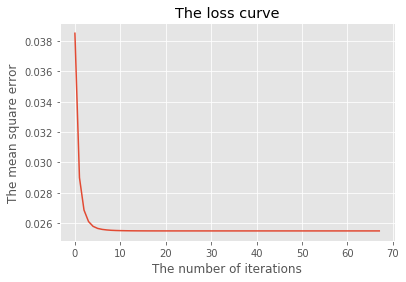

In [12]:
from sklearn.linear_model import Lasso as Sk_las

lr=Lasso(alpha=0.1,tol=1e-6).fit(X,y)
sk_las=Sk_las(alpha=0.1,tol=1e-6).fit(X,y)
print(lr.predict(X)[:5])
print(sk_las.predict(X)[:5])